In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('All libray imported')

All libray imported


In [2]:
# load the dataset
df=pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.shape

(9578, 14)

In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
# missing value
df.isnull().sum().any()

False

In [7]:
df['not.fully.paid'].value_counts()
# 0- full paid, 1 - not paid
# imbalanced data

0    8045
1    1533
Name: not.fully.paid, dtype: int64

## Exploratory data analysis of different factors of the dataset.

In [11]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

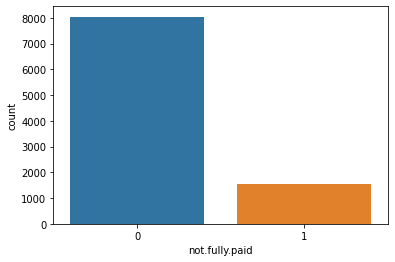

In [10]:
sns.countplot(x=df['not.fully.paid'])
plt.show()

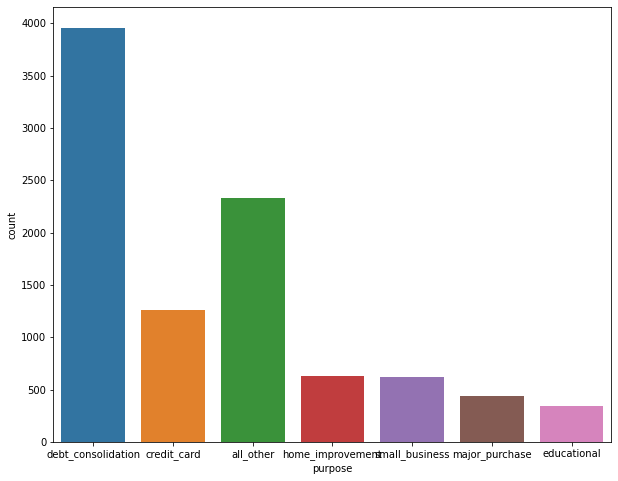

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['purpose'])
plt.show()

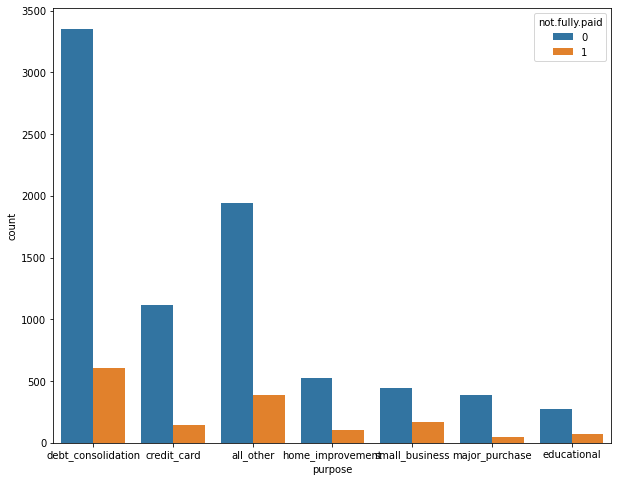

In [15]:
# purpose ---- not fully paid
plt.figure(figsize=(10,8))
sns.countplot(x='purpose',hue='not.fully.paid',data=df)
plt.show()

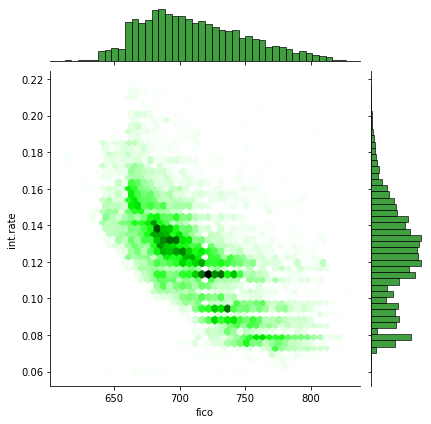

In [22]:
# bi variate analysis
sns.jointplot(x='fico',y='int.rate',data=df,kind='hex',color='g')
plt.show()

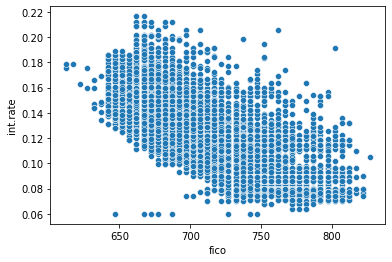

In [18]:
sns.scatterplot(x='fico',y='int.rate',data=df)
plt.show()

<AxesSubplot:xlabel='fico', ylabel='Count'>

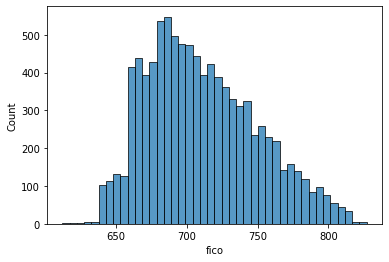

In [24]:
sns.histplot(df['fico'])

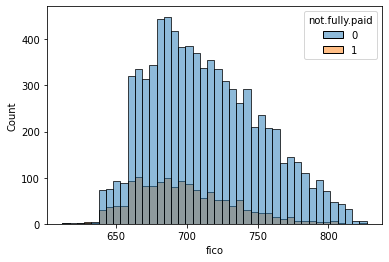

In [29]:
sns.histplot(x='fico',hue='not.fully.paid',data=df)
plt.show()

Feature Transformation

Transform categorical values into numerical values (discrete)

In [31]:
# handle imbalanced dataset
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [3]:
not_fully_paid_0=df[df['not.fully.paid']==0]
not_fully_paid_1=df[df['not.fully.paid']==1]

In [33]:
not_fully_paid_0.shape

(8045, 14)

In [34]:
not_fully_paid_1.shape

(1533, 14)

In [4]:
# resample
from sklearn.utils import resample
df_minor_upsample=resample(not_fully_paid_1,replace=True,n_samples=8045)


In [5]:
new_df=pd.concat([not_fully_paid_0,df_minor_upsample])

In [6]:
# shuffle
from sklearn.utils import shuffle
new_df=shuffle(new_df)

In [40]:
new_df['not.fully.paid'].value_counts()

1    8045
0    8045
Name: not.fully.paid, dtype: int64

In [41]:
new_df.shape

(16090, 14)

In [42]:
new_df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [7]:
# convert purpose into num data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [8]:
for i in new_df.columns:
    if new_df[i].dtypes=='object':
        new_df[i]=le.fit_transform(new_df[i])

In [9]:
new_df.dtypes

credit.policy          int64
purpose                int64
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

### Additional Feature Engineering

### You will check the correlation between features and will drop those features which have a strong correlation

### This will help reduce the number of features and will leave you with the most relevant features

In [46]:
new_df.corr()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,0.005861,-0.288937,0.041465,0.016925,-0.088006,0.372774,0.102268,-0.186375,-0.094429,-0.538857,-0.054748,-0.064381,-0.197808
purpose,0.005861,1.000000,0.145996,0.206857,0.128597,-0.042657,0.067941,0.067178,0.079258,-0.074174,0.044583,0.001150,0.005147,0.063738
int.rate,-0.288937,0.145996,1.000000,0.273957,0.085475,0.202708,-0.680676,-0.095300,0.080503,0.414549,0.183084,0.148380,0.099485,0.219427
installment,0.041465,0.206857,0.273957,1.000000,0.479974,0.029786,0.110034,0.188770,0.244813,0.053135,-0.014425,0.006109,-0.025968,0.067077
log.annual.inc,0.016925,0.128597,0.085475,0.479974,1.000000,-0.032581,0.112777,0.351007,0.368914,0.075050,0.033616,0.017462,0.018513,-0.041261
dti,-0.088006,-0.042657,0.202708,0.029786,-0.032581,1.000000,-0.211132,0.103115,0.158383,0.328099,0.015925,-0.033607,0.028315,0.054709
fico,0.372774,0.067941,-0.680676,0.110034,0.112777,-0.211132,1.000000,0.257651,0.012756,-0.492636,-0.190574,-0.202828,-0.154560,-0.213241
days.with.cr.line,0.102268,0.067178,-0.095300,0.188770,0.351007,0.103115,0.257651,1.000000,0.242789,0.018414,-0.033147,0.072104,0.072899,-0.034275
revol.bal,-0.186375,0.079258,0.080503,0.244813,0.368914,0.158383,0.012756,0.242789,1.000000,0.147408,0.039259,-0.030895,-0.026750,0.065767
revol.util,-0.094429,-0.074174,0.414549,0.053135,0.075050,0.328099,-0.492636,0.018414,0.147408,1.000000,-0.022846,-0.060766,0.081496,0.109194


<AxesSubplot:>

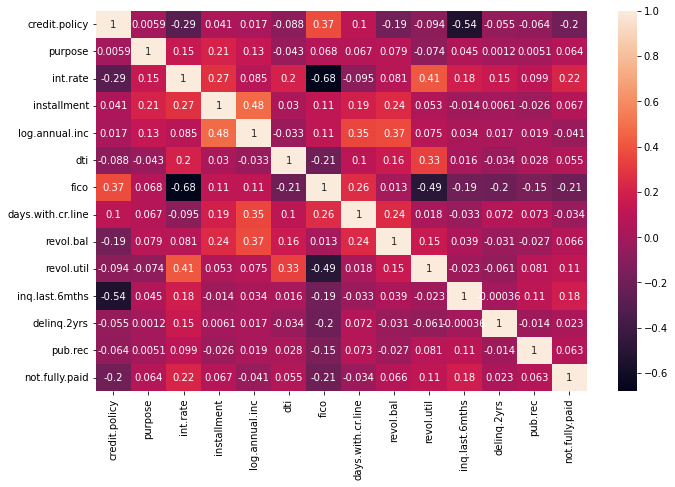

In [49]:
plt.figure(figsize=(11,7))
sns.heatmap(new_df.corr(),annot=True)

In [50]:
# see the sorted results
new_df.corr().abs()['not.fully.paid'].sort_values(ascending=False)

not.fully.paid       1.000000
int.rate             0.219427
fico                 0.213241
credit.policy        0.197808
inq.last.6mths       0.177353
revol.util           0.109194
installment          0.067077
revol.bal            0.065767
purpose              0.063738
pub.rec              0.063449
dti                  0.054709
log.annual.inc       0.041261
days.with.cr.line    0.034275
delinq.2yrs          0.023488
Name: not.fully.paid, dtype: float64

In [51]:
new_df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [10]:
# take columns
X=new_df[['credit.policy','purpose', 'int.rate', 'installment','fico','revol.bal','revol.util','inq.last.6mths','pub.rec']]

In [56]:
X.shape

(16090, 9)

In [11]:
y=new_df['not.fully.paid']

In [12]:
# Create train set & test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [59]:
X_train.shape

(12872, 9)

In [60]:
X_test.shape

(3218, 9)

In [61]:
X_train

,credit.policy,purpose,int.rate,installment,fico,revol.bal,revol.util,inq.last.6mths,pub.rec
5839,1,6,0.1982,556.10,692,10893,97.3,3,0
4825,1,4,0.1392,204.83,682,4417,78.9,0,0
9146,0,0,0.1442,51.58,697,25466,32.4,4,0
204,1,2,0.1186,165.74,667,2197,75.8,0,0
7719,0,1,0.1324,404.03,697,152416,80.1,0,0
...,...,...,...,...,...,...,...,...,...
3005,1,0,0.1347,409.62,707,20460,39.8,1,0
9291,0,2,0.1357,475.56,707,12177,75.6,5,0
7571,1,2,0.0788,437.93,747,4482,19.4,0,0
9445,0,2,0.1913,367.21,682,13650,94.8,9,1


In [13]:
# Apply scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [14]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Create a deep learning model using Keras with Tensorflow backend

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [65]:
# create the architecture
# 2 ANN layer
model=Sequential()
model.add(Dense(19,activation='relu',input_shape=[9]))
model.add(Dropout(0.20))


model.add(Dense(10,activation='relu'))
model.add(Dropout(0.20))

# output layer
model.add(Dense(1,activation='sigmoid'))

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                190       
                                                                 
 dropout (Dropout)           (None, 19)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                200       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [67]:
# compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [70]:
early_stop=EarlyStopping(monitor='val_loss',min_delta=0.001,mode='min',patience=10,verbose=1)

In [71]:
model.fit(X_train,y_train,
          epochs=50,
          batch_size=256,
          validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6500 - accuracy: 0.6184 - val_loss: 0.6398 - val_accuracy: 0.6274
Epoch 2/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6497 - accuracy: 0.6157 - val_loss: 0.6400 - val_accuracy: 0.6302
Epoch 3/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6481 - accuracy: 0.6231 - val_loss: 0.6391 - val_accuracy: 0.6302
Epoch 4/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6480 - accuracy: 0.6184 - val_loss: 0.6392 - val_accuracy: 0.6293
Epoch 5/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.6193 - val_loss: 0.6392 - val_accuracy: 0.6302
Epoch 6/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6465 - accuracy: 0.6224 - val_loss: 0.6389 - val_accuracy: 0.6299
Epoch 7/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6479 - accuracy: 0.6211 - val_loss: 0.6384 - val_accuracy: 0.6302
Epoch 8/50
51/51 [==

In [72]:
history=model.fit(X_train,y_train,
          epochs=50,
          batch_size=256,
          validation_data=(X_test,y_test))

Epoch 1/50
51/51 [==============================] - 0s 4ms/step - loss: 0.6425 - accuracy: 0.6284 - val_loss: 0.6373 - val_accuracy: 0.6224
Epoch 2/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6434 - accuracy: 0.6282 - val_loss: 0.6364 - val_accuracy: 0.6255
Epoch 3/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6430 - accuracy: 0.6255 - val_loss: 0.6363 - val_accuracy: 0.6252
Epoch 4/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6418 - accuracy: 0.6294 - val_loss: 0.6363 - val_accuracy: 0.6262
Epoch 5/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6423 - accuracy: 0.6279 - val_loss: 0.6375 - val_accuracy: 0.6265
Epoch 6/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6406 - accuracy: 0.6282 - val_loss: 0.6369 - val_accuracy: 0.6234
Epoch 7/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6414 - accuracy: 0.6282 - val_loss: 0.6363 - val_accuracy: 0.6255
Epoch 8/50
51/51 [==

In [73]:
model.evaluate(X_test,y_test)

101/101 [==============================] - 0s 979us/step - loss: 0.6335 - accuracy: 0.6246


[0.6334601640701294, 0.6246115565299988]

In [74]:
y_pred=model.predict(X_test)

In [75]:
y_pred

array([[0.17968673],
       [0.63630617],
       [0.5241694 ],
       ...,
       [0.6814194 ],
       [0.3570289 ],
       [0.26826683]], dtype=float32)

In [76]:
predictions=(y_pred>0.5).astype('int')

In [77]:
predictions

array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [78]:
y_test

2504    1
8434    1
2719    0
2547    0
6665    0
       ..
5536    1
1558    1
8614    1
4774    0
4838    0
Name: not.fully.paid, Length: 3218, dtype: int64

In [79]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(predictions,y_test)

0.6246115599751398

In [81]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.64      0.63      0.63      1656
           1       0.61      0.62      0.61      1562

    accuracy                           0.62      3218
   macro avg       0.62      0.62      0.62      3218
weighted avg       0.62      0.62      0.62      3218



In [82]:
model.save('loan_default1.h5')

## Model2 Architecture


In [16]:
# batch Normalization
from tensorflow.keras.layers import BatchNormalization

In [19]:
# create the architecture model2
# First ANN layer
model1=Sequential()
model1.add(Dense(128,activation='relu',input_shape=[9]))
model1.add(BatchNormalization())
model1.add(Dropout(0.20))

# Second ANN layer
model1.add(Dense(64,activation='tanh'))
model1.add(BatchNormalization())
model1.add(Dropout(0.20))
           

# third ANN layer
model1.add(Dense(32,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.20))

# output layer
model1.add(Dense(1,activation='sigmoid'))

In [20]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [21]:
# compile the model
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
history=model1.fit(X_train,y_train,
          epochs=100,
          batch_size=256,
          validation_data=(X_test,y_test))

Epoch 1/100
51/51 [==============================] - 1s 8ms/step - loss: 0.7748 - accuracy: 0.5655 - val_loss: 0.6628 - val_accuracy: 0.5998
Epoch 2/100
51/51 [==============================] - 0s 5ms/step - loss: 0.7036 - accuracy: 0.5858 - val_loss: 0.6565 - val_accuracy: 0.5938
Epoch 3/100
51/51 [==============================] - 0s 4ms/step - loss: 0.6855 - accuracy: 0.5987 - val_loss: 0.6513 - val_accuracy: 0.6010
Epoch 4/100
51/51 [==============================] - 0s 5ms/step - loss: 0.6727 - accuracy: 0.5988 - val_loss: 0.6493 - val_accuracy: 0.6085
Epoch 5/100
51/51 [==============================] - 0s 5ms/step - loss: 0.6651 - accuracy: 0.6082 - val_loss: 0.6459 - val_accuracy: 0.6103
Epoch 6/100
51/51 [==============================] - 0s 4ms/step - loss: 0.6603 - accuracy: 0.6078 - val_loss: 0.6460 - val_accuracy: 0.6125
Epoch 7/100
51/51 [==============================] - 0s 5ms/step - loss: 0.6519 - accuracy: 0.6142 - val_loss: 0.6444 - val_accuracy: 0.6162
Epoch 8/100
5

In [23]:
model1.evaluate(X_test,y_test)

101/101 [==============================] - 0s 1ms/step - loss: 0.5663 - accuracy: 0.7150


[0.5662867426872253, 0.715040385723114]

In [24]:
model1.evaluate(X_train,y_train)

403/403 [==============================] - 0s 1ms/step - loss: 0.4959 - accuracy: 0.7648


[0.4958527088165283, 0.7648383975028992]

# Hyparameter tuning in Keras

In [25]:
!pip install keras-tuner

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [32]:
import keras_tuner
import tensorflow

In [33]:
def build_model(hp):
    model=Sequential()
    
    # first hidden layer
    model.add(Dense(units=hp.Int('units',min_value=32,max_value=1024,step=16),
                   activation=hp.Choice('activation',['relu','tanh']),input_shape=[9]))
    
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))
                      
        
    # Second hidden layer
    model.add(Dense(units=hp.Int('units',min_value=32,max_value=1024,step=16),
                   activation=hp.Choice('activation',['relu','tanh'])))
    
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))
    
     # third hidden layer
    model.add(Dense(units=hp.Int('units',min_value=32,max_value=1024,step=16),
                   activation=hp.Choice('activation',['relu','tanh'])))
    
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))
    
    model.add(Dense(1,activation='sigmoid'))
    
    learning_rate=hp.Float('learning_rate',min_value=0.001,max_value=0.1,step=0.01)
        
    model.compile(loss='binary_crossentropy',
                  optimizer=tensorflow.keras.optimizers.Adam(learning_rate),
                 metrics=['accuracy'])
    return model

In [34]:
import keras_tuner as kt

In [35]:
build_model(kt.HyperParameters())

In [36]:
rtuner=kt.RandomSearch(hypermodel=build_model,
                       objective='val_accuracy',
                       max_trials=10                   
                      )

In [37]:
rtuner.search(X_train,y_train,
             epochs=50,validation_data=(X_test,y_test),
             verbose=2)

Trial 10 Complete [00h 01m 54s]
val_accuracy: 0.6109384894371033

Best val_accuracy So Far: 0.6886264681816101
Total elapsed time: 00h 37m 47s
INFO:tensorflow:Oracle triggered exit


In [40]:
par=rtuner.get_best_hyperparameters()

In [50]:
for h_param in [f"units{i}" for i in range(1,4)]+['learning_rate']:
    print(h_param,rtuner.get_best_hyperparameters()[0].get(h_param))


KeyError: 'units1 does not exist.'

In [47]:
par

In [43]:
models=rtuner.get_best_models()

In [44]:
len(models)

1

In [45]:
models[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 752)               7520      
                                                                 
 batch_normalization (BatchN  (None, 752)              3008      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 752)               0         
                                                                 
 dense_1 (Dense)             (None, 752)               566256    
                                                                 
 batch_normalization_1 (Batc  (None, 752)              3008      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 752)               0

In [51]:
y_pred=models[0].predict(X_test)>=0.5

In [52]:
y_pred

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6886264760720945